# Folium US Map

This code reads from sorted_accidents.csv which contains a dataset of the number of accidents against every unique longitude and latitude along with county names across the US. It creates a map of the US using the Folium library. We provide the center longitudes and latitudes of the US for the map. It uses a different color scheme to show the intensity of accidents at each longitude and latitude. Green for low numbers of accidents, brown for mild and red for high numbers of accidents.

In [21]:
import pandas as pd
import folium

data = pd.read_csv('sorted_accidents.csv')

# Create a folium map centered on the US
center_latitude = 39.8283  # Center latitude for the US
center_longitude = -98.5795  # Center longitude for the US
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=4)

# Define a color scale for marker intensity
color_scale = {
    'low': 'green',
    'medium': 'orange',
    'high': 'red'
}

# Define ranges for accident count intensity
max_accidents = data['count'].max()
low_threshold = max_accidents * 0.25  # Adjust thresholds as needed
medium_threshold = max_accidents * 0.5
print(medium_threshold)
print(low_threshold)



# Add markers for each data point (accident) on the map
for idx, row in data.iterrows():
    if row['count'] <= low_threshold:
        color = color_scale['low']
    elif row['count'] <= medium_threshold:
        color = color_scale['medium']
    else:
        color = color_scale['high']

    folium.Marker(
        [row['lat_CountyCentroid'], row['long_CountyCentroid']],
        popup=f"{row['county_name']} - Animal Vehicle Collisions: {row['count']}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Show the map
m.save('accidents_map.html')  # Save the map as an HTML file

m  # Display the map in Jupyter Notebook or similar environments



3434.0
1717.0


# Heat Map
This snippet uses geopandas, pandas and matplotlib to create a heatmap of the US, first it reads the shape file of the us states and then the accident_data.csv which contains the number of collisions for each state, to show the intensity of animal-vehicle collisions state wise. The measurement scale provides the color intensity to the map with reference to numbers. The csv dataset file and the shape file are merged to showcase the heat map. Some state’s data was also missing, so they are shown colorless.

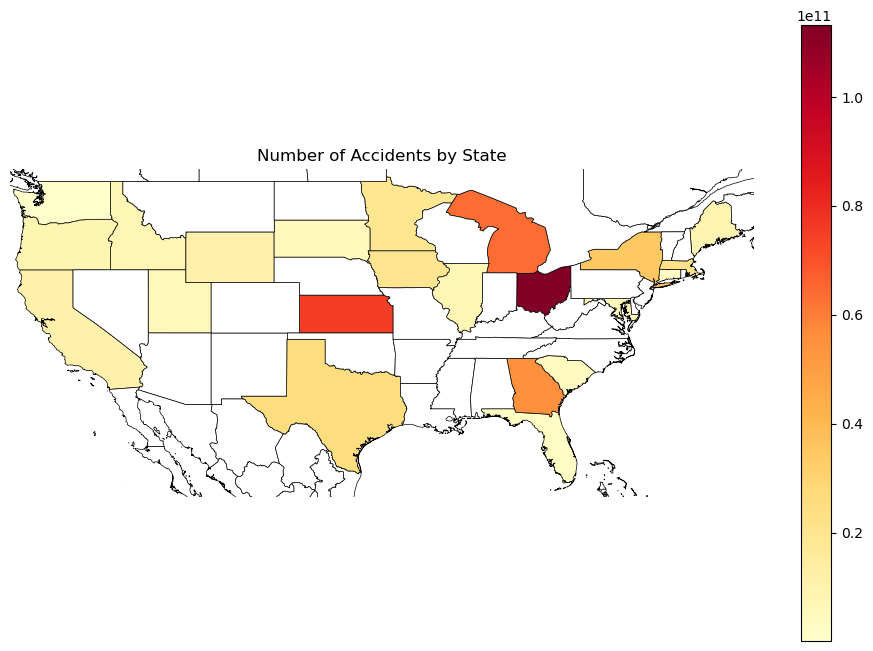

In [62]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile for US states
us_states = gpd.read_file('ne_10m_admin_1_states_provinces.shp')

# Load the CSV file containing accidents data
accidents_data = pd.read_csv('state_accidents.csv')

# Merge the shapefile with the accidents data
merged_data = us_states.merge(accidents_data, how='left', left_on='name', right_on='state')

# Define the geographic extent of the United States
us_extent = [-125, -66, 24, 50]  # [min_longitude, max_longitude, min_latitude, max_latitude]

# Plotting the choropleth map with adjusted settings for missing data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='no', ax=ax, legend=True, cmap='YlOrRd', edgecolor='black', linewidth=0.5,
                 missing_kwds={
                     "color": "white",  # This will color missing data states as white
                     "edgecolor": "black"
                 })
ax.set_title('Number of Accidents by State')

# Set limits to focus on the US map
ax.set_xlim(us_extent[0], us_extent[1])
ax.set_ylim(us_extent[2], us_extent[3])

# Remove axis numbers and ticks
ax.axis('off')

plt.show()

# Month Wise Bar Chart
This code snippet showcases the number of collisions month wise, for this we have used animal.csv dataset, we have grouped the number of collisions against individual months using data.groupby(), and then displayed the number of accidents on the y-axis and the month on x-axis.

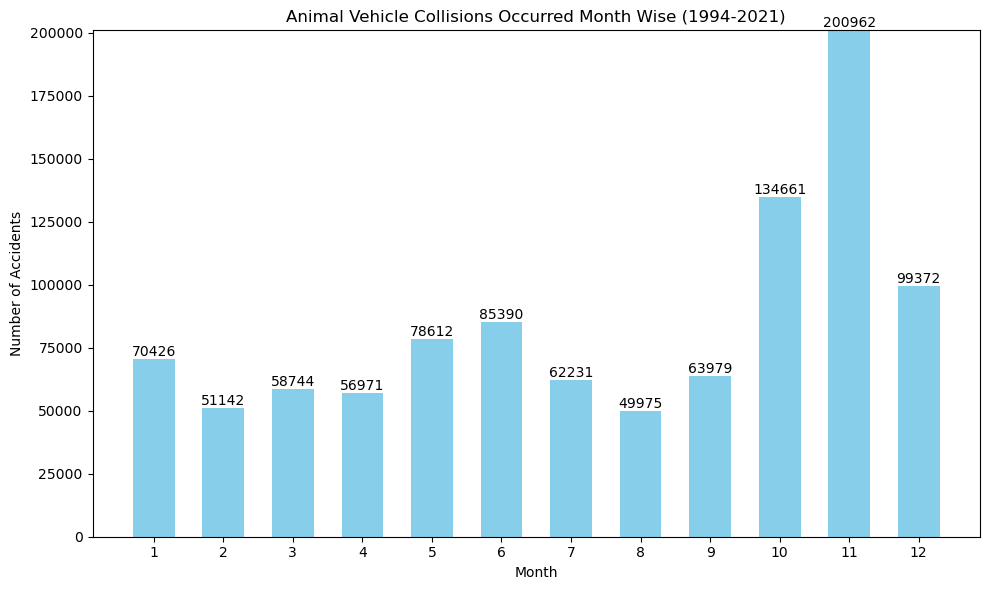

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
data = pd.read_csv('anima.csv')

# Step 2: Group data by month and count the number of accidents per month
monthly_accidents = data.groupby('month').size()

# Increase figure size for better visualization
plt.figure(figsize=(10, 6))  # Adjust the values to fit your preferences

# Step 3: Create a bar chart with increased bar width and adjusted spacing between bars
plt.bar(monthly_accidents.index, monthly_accidents.values, width=0.6, color='skyblue')  # Adjust width as needed
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Animal Vehicle Collisions Occurred Month Wise (1994-2021)')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis

# Set y-axis limits based on the maximum count of accidents
plt.ylim(0, monthly_accidents.max() + 10)  # Adjust the range for better visualization

# Show the exact count on top of each bar
for i, value in enumerate(monthly_accidents.values):
    plt.text(i + 1, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)  # Adjust text position and size

plt.tight_layout()  # Adjust the layout to prevent cropping of labels
plt.show()


# Day Night Collision Distribution
In this snippet we have used the time_decimal column from animal.csv. We have categorized the collisions into three categories Morning (5-12), After Noon (12-17), Evening (17-21) and Night (above 21) based on the time decimal. Using value_counts() we have calculated the number of collisions in each category and then using matplotlib we have plotted it in the graph.

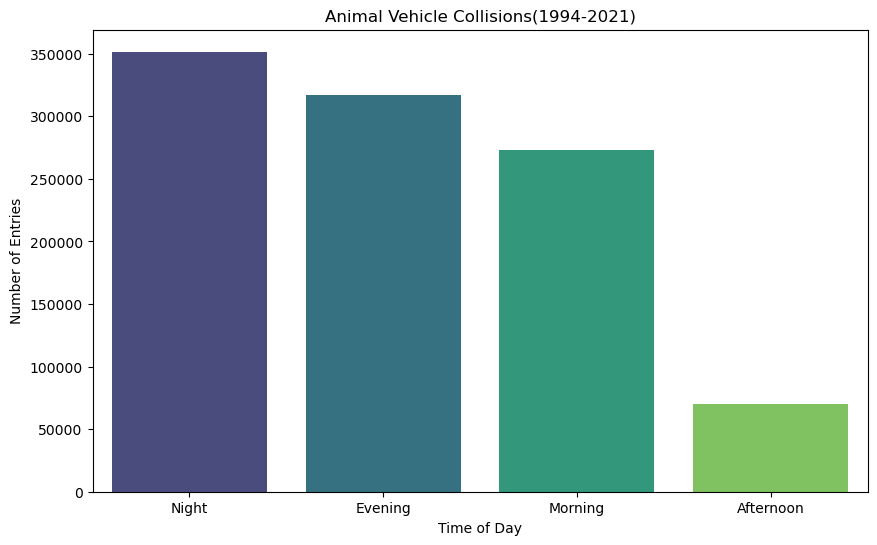

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize time of day
def categorize_time_of_day(time_decimal):
    if 5 <= time_decimal < 12:
        return "Morning"
    elif 12 <= time_decimal < 17:
        return "Afternoon"
    elif 17 <= time_decimal < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to the time.decimal column
data['time_of_day'] = data['time.decimal'].apply(categorize_time_of_day)

# Count the number of entries in each time category
time_of_day_counts = data['time_of_day'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="viridis")
plt.title('Animal Vehicle Collisions(1994-2021)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Entries')
plt.show()

# Pie Chart
In the pie chart we have used the previous graph data and converted it into percentage to provide a better perspective.

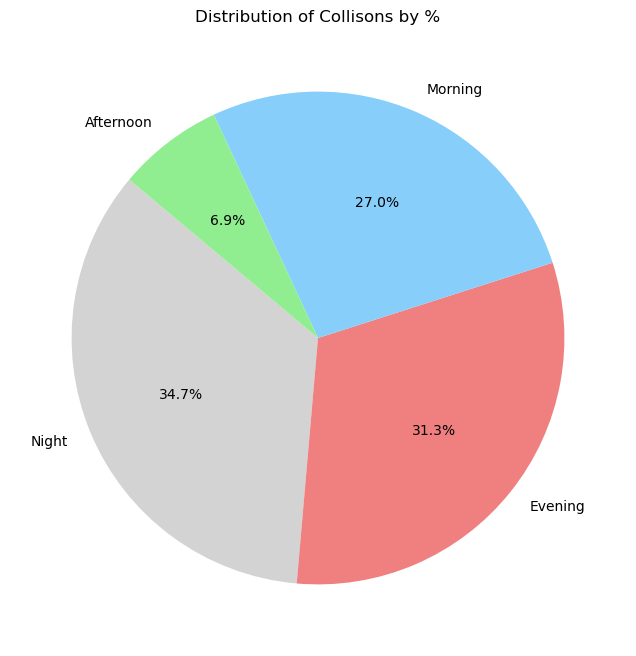

In [72]:
# Create a pie chart for the distribution of data entries by time of day
plt.figure(figsize=(10, 8))
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgray', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Collisons by %')
plt.show()

# Data Cleaning
In this snippet we start cleaning the dataset by removing the NaN values from the dataset, The NaN values in the longitudes and latitudes columns are replaced by the long_CountyCentroid and lat_CountyCentroid to ensure that we have geographical co-ordinates in order. The updated csv file is then saved into model_data.csv.

In [22]:
import pandas as pd

# Load the data
file_path = 'anima.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Replace NaN values in 'Latitude' and 'Longitude'
data['Latitude'] = data['Latitude'].fillna(data['lat_CountyCentroid'])
data['Longitude'] = data['Longitude'].fillna(data['long_CountyCentroid'])


# Optionally, save the updated dataframe to a new file
data.to_csv('model_data.csv', index=False)

data_cleaned = data.dropna(subset=['time.decimal', 'month', 'county_name', 'lat_CountyCentroid', 
                                   'long_CountyCentroid', 'doy', 'week', 'sunrise', 'sunrise.decimal', 
                                   'sunset', 'sunset.decimal', 'timezone', 'state_abbreviation'])

# Optionally, save the cleaned dataframe to a new file
data_cleaned.to_csv('model_data.csv', index=False)


# Data Augmentation
To apply logistic regression correctly we insert an accident_binary column inserting 0 as no collision value into 70% randomly selected rows in the dataset and inserting 1 as collision into 30% randomly selected rows. This ensures that the dataset is not biased towards one scenario. After that we save the file into training.csv.

In [3]:
import pandas as pd
import numpy as np

# Load the data
file_path = 'model_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate the number of rows for 30% and 70% of the dataset
num_rows = len(data)
num_accidents = int(0.3 * num_rows)

# Create the 'accident_binary' column
# Initially set all values to 0
data['accident_binary'] = 0
# Randomly choose 30% of the rows to set as 1
accident_indices = np.random.choice(data.index, num_accidents, replace=False)
data.loc[accident_indices, 'accident_binary'] = 1

# Save the modified dataset
new_file_path = 'training.csv'  # Replace with the path for the new file
data.to_csv(new_file_path, index=False)

# Model Explanation
In this model code we import the necessary libraries required for the training, testing and fitting of the model. Then the code reads the dataset training.csv and specify the variables which we are using in our logistic regression model i.e. Longitude, Latitude, time_decimal, state, month and accident_binary. Then we handle missing values by dropping them. The code defines categorical and numerical features in the dataset. Categirical features include only the ‘state’ while numerical features include ‘Longitude’, ‘Latitude’, ‘time_decimal’ and ‘month’. The code then creates a data processing pipeline for numerical and categorical features. For numerical features it imputes the missing values using the mean of the column and then scaling the value, for categorical features it handles the missing values by replacing them and then performs one-hot encoding to convert them into numerical representations.

Now the ColumnTransformer combines both numerical and categorical transformers into a single preprocessor that can handle both types of features. The code then separates the data into features(X) and the target value (Y).

Using ‘test_train_split()’, the data is split into testing and training sets with 80% for training (X_train, Y_train) and 20% for testing (X_test,Y_test). The ‘random_state’ parameter ensures reproductibility of the split.
Now it creates a machine learning pipeline (model). It includes a preprocessing step using the previously defined transformer and then uses logistic regression as the classifier. 

The model is then saved in “logistic_regression_model.joblib” and a classification report is generated which shows the accuracy, precision, recall and F1 score.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import joblib

# Step 0: Load the CSV File
file_path = 'training.csv'
data = pd.read_csv(file_path)

# Step 1: Data Preparation
relevant_columns = ['Longitude', 'Latitude', 'time.decimal', 'state', 'month', 'accident_binary']
data_model = data[relevant_columns]
data_model = data_model.dropna()

# Step 2: Data Encoding and Splitting
categorical_features = ['state']
numerical_features = ['Longitude', 'Latitude', 'time.decimal', 'month']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X = data_model.drop('accident_binary', axis=1)
y = data_model['accident_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Model Training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculating metrics for binary classification (averaged across classes)
classification_report_output = classification_report(y_test, y_pred, zero_division=1, target_names=['Class 0', 'Class 1'], output_dict=True)
binary_metrics = classification_report_output['weighted avg']

# Extracting precision, recall, f1-score, and accuracy
precision = binary_metrics['precision']
recall = binary_metrics['recall']
f1_score = binary_metrics['f1-score']
accuracy = accuracy_score(y_test, y_pred)

# Creating a dictionary with labeled metrics
labeled_metrics = {
    "Accuracy": accuracy,
    "F1-Score": f1_score,
    "Recall": recall,
    "Precision":precision
}

# Step 5: Save the Model (unchanged)
model_file_path = 'logistic_regression_model.joblib'
joblib.dump(model, model_file_path)

# Output labeled metrics
labeled_metrics

{'Accuracy': 0.6973757202900651,
 'F1-Score': 0.573040947194623,
 'Recall': 0.6973757202900651,
 'Precision': 0.788957174960022}

# Prediction Function

This snippet takes the user input of longitude, latitude, state, time_decimal and month of the year and uses the previously saved model to make a prediction of a collision.

In [23]:
def make_prediction(model_file_path):
    # Load the trained model
    model = joblib.load(model_file_path)

    # User inputs
    longitude = float(input("Enter Longitude: "))
    latitude = float(input("Enter Latitude: "))
    state = input("Enter State (Abbreviated i.e. WA for Washinghton): ")
    time_decimal = float(input("Enter Time (in decimal format i.e. 1.30 for 1:30): "))
    month = int(input("Enter Month (as a number): "))

    # Creating a DataFrame from user inputs
    input_data = pd.DataFrame([{
        'Longitude': longitude,
        'Latitude': latitude,
        'state': state,
        'time.decimal': time_decimal,
        'month': month
    }])

    # Making a prediction
    prediction = model.predict(input_data)
    prediction_probability = model.predict_proba(input_data)

    # Getting the probability for the 'collision' class (assuming it is the second class)
    collision_probability = prediction_probability[0][1]

    # Output the prediction and probability
    return ("Collision Prediction: " + ("Yes" if prediction[0] == 1 else "No"),
            f"Probability of Collision: {collision_probability * 100:.2f}%")

# Step 6: Make a Prediction
model_file_path = 'logistic_regression_model.joblib'
prediction, probability = make_prediction(model_file_path)
print(prediction)
print(probability)

Enter Longitude: 123.78
Enter Latitude: 45.5
Enter State (Abbreviated i.e. WA for Washinghton): WA
Enter Time (in decimal format i.e. 1.30 for 1:30): 1.30
Enter Month (as a number): 1
Collision Prediction: No
Probability of Collision: 31.17%


This code shows the highest number of collision in states, the table below shows the exact number of collisions in each state.

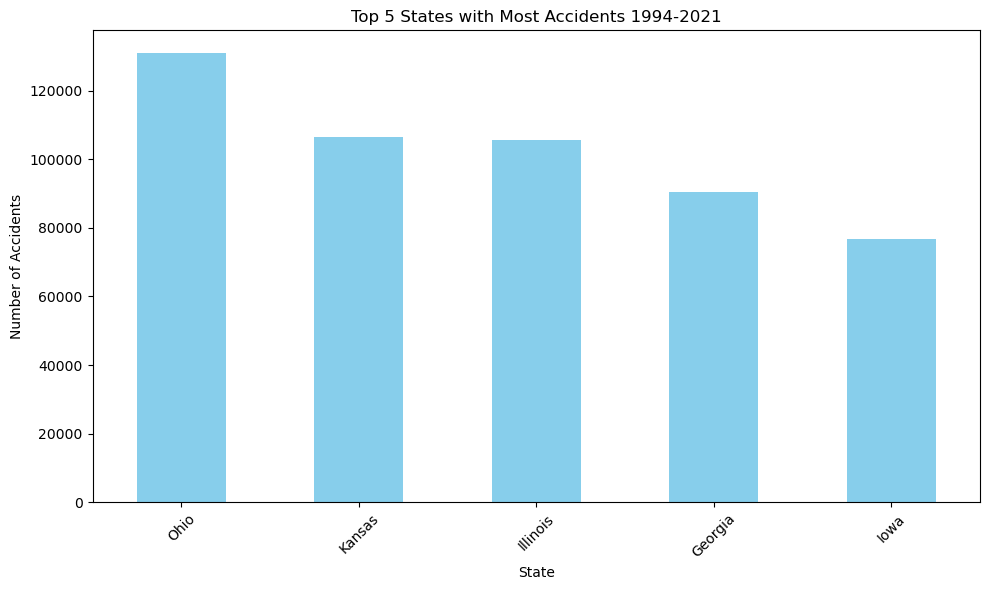

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the CSV file
accidents_data = pd.read_csv('accidents_by_state.csv')

# Group data by 'state' and sum the 'no' column, then select the top 5 states with most accidents
top_5_states = accidents_data.groupby('state')['no'].sum().nlargest(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States with Most Accident 1994-2021')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = 'accidents_by_state.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the 'state' and 'no' columns in a table with renamed columns
selected_columns = data[['state', 'no']]
selected_columns = selected_columns.rename(columns={'state': 'State', 'no': 'Number of Accidents'})

# Apply styling to the table
styled_table = selected_columns.style \
    .set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px solid black'),
                  ('background-color', '#f2f2f2'),
                  ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black'),
                  ('text-align', 'center')]
    }])

# Display the styled table
display(styled_table)


,State,Number of Accidents
0,Ohio,131074
1,Kansas,106391
2,Illinois,105768
3,Georgia,90460
4,Iowa,76725
5,Texas,70573
6,Michigan,66226
7,New York,64938
8,Wyoming,57465
9,Massachusetts,46868
